In [1]:
!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
import csv
import numpy as np

def read_column_from_csv(filename, column_name):
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        data = list(csv_reader)
        column_index = data[0].index(column_name)
        
        return np.array([row[column_index] for row in data[1:]])

# Testing the function
apc_data = read_column_from_csv('russia_losses_equipment.csv', 'APC')
print(apc_data[:5])  # Displaying the first 5 data points


['516' '706' '706' '816' '846']


In [18]:
daily_losses = np.diff(apc_data.astype(int), prepend=0)
print(daily_losses[:5])  # Displaying the first 5 daily losses


[516 190   0 110  30]


In [19]:
greatest_losses = np.sort(daily_losses)[-5:]
print(greatest_losses)


[ 60  96 110 190 516]


In [34]:
# Convert string representations of dates to datetime64 objects
start_date = np.datetime64('2023-06-01')
end_date = np.datetime64('2023-08-31')

# Use dates to find summer losses
summer_losses = daily_losses[(dates_as_datetime >= start_date) & (dates_as_datetime <= end_date)].sum()
print(summer_losses)


1132


In [35]:
mean_losses = daily_losses[100:500].mean()
print(mean_losses)


11.4625


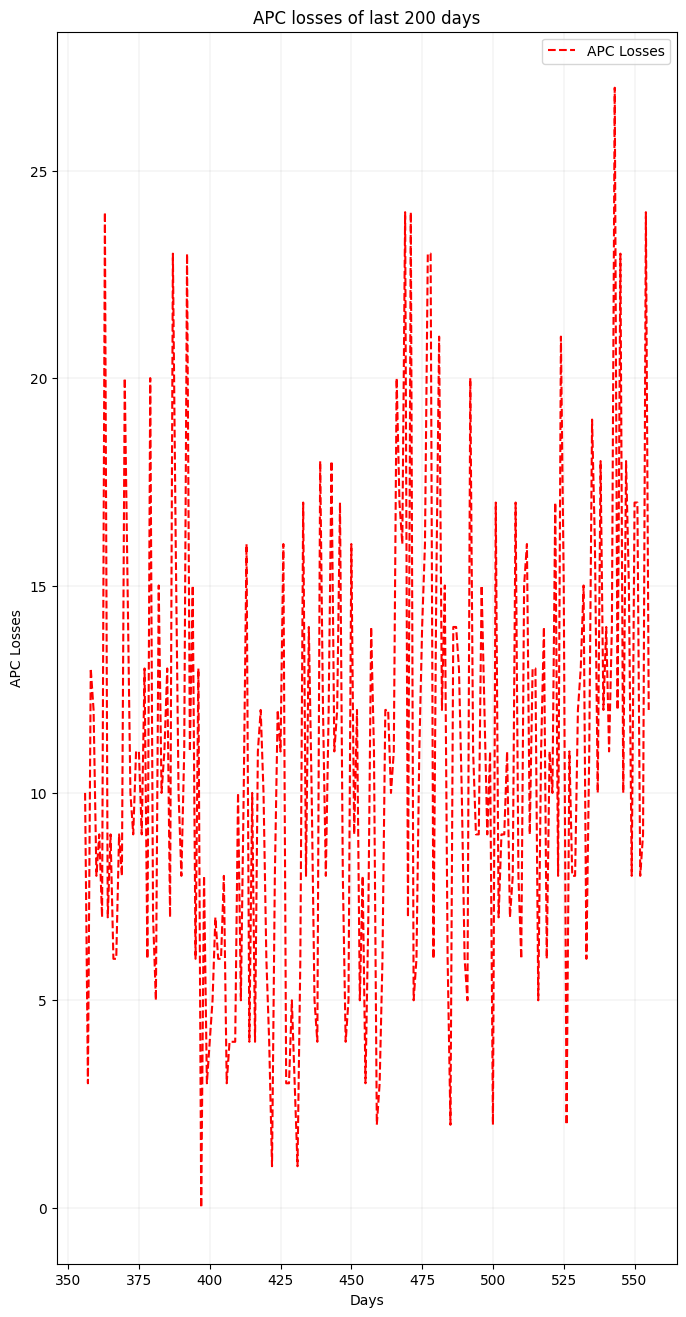

In [36]:
import matplotlib.pyplot as plt

last_200_losses = daily_losses[-200:]
days = np.arange(len(daily_losses) - 200, len(daily_losses))

plt.figure(figsize=(8, 16), dpi=100)
plt.plot(days, last_200_losses, linestyle='--', color='red', label='APC Losses')
plt.title("APC losses of last 200 days")
plt.xlabel("Days")
plt.ylabel("APC Losses")
plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.legend()
plt.savefig("apc_losses_last_200_days.png", dpi=100)
plt.show()
